In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None

In [2]:
from Code import plot_physio

## Set Paths and Parameters

In [3]:
# ToDo: Adapt wave and problematic subject list
wave = 2

In [4]:
dir_path = os.getcwd()
dir_path = os.path.abspath(os.path.join(dir_path, os.pardir))
# ToDo: Adapt folder name
file_path = os.path.join(dir_path, f'Data-Wave{wave}')

In [5]:
SA_score="SPAI"

In [6]:
df_scores = pd.read_csv(os.path.join(file_path, 'scores_summary.csv'), decimal='.', sep=';')
df_scores = df_scores.loc[~df_scores['exclude']]
median = df_scores[SA_score].median()

## Physiology

In [8]:
save_path = os.path.join(dir_path, f'Plots-Wave{wave}', 'Physiology')
if not os.path.exists(save_path):
    print('creating path for saving')
    os.makedirs(save_path)
    
permutations = 1000

HR: N - HSA = 22


100%|██████████| 1000/1000 [01:19<00:00, 12.64it/s]


EDA: N - HSA = 21


100%|██████████| 1000/1000 [01:09<00:00, 14.42it/s]


PUPIL: N - HSA = 24


100%|██████████| 1000/1000 [01:19<00:00, 12.52it/s]


HR: N - LSA = 22


100%|██████████| 1000/1000 [01:16<00:00, 13.03it/s]


EDA: N - LSA = 22


100%|██████████| 1000/1000 [01:09<00:00, 14.49it/s]


PUPIL: N - LSA = 24


100%|██████████| 1000/1000 [01:18<00:00, 12.71it/s]


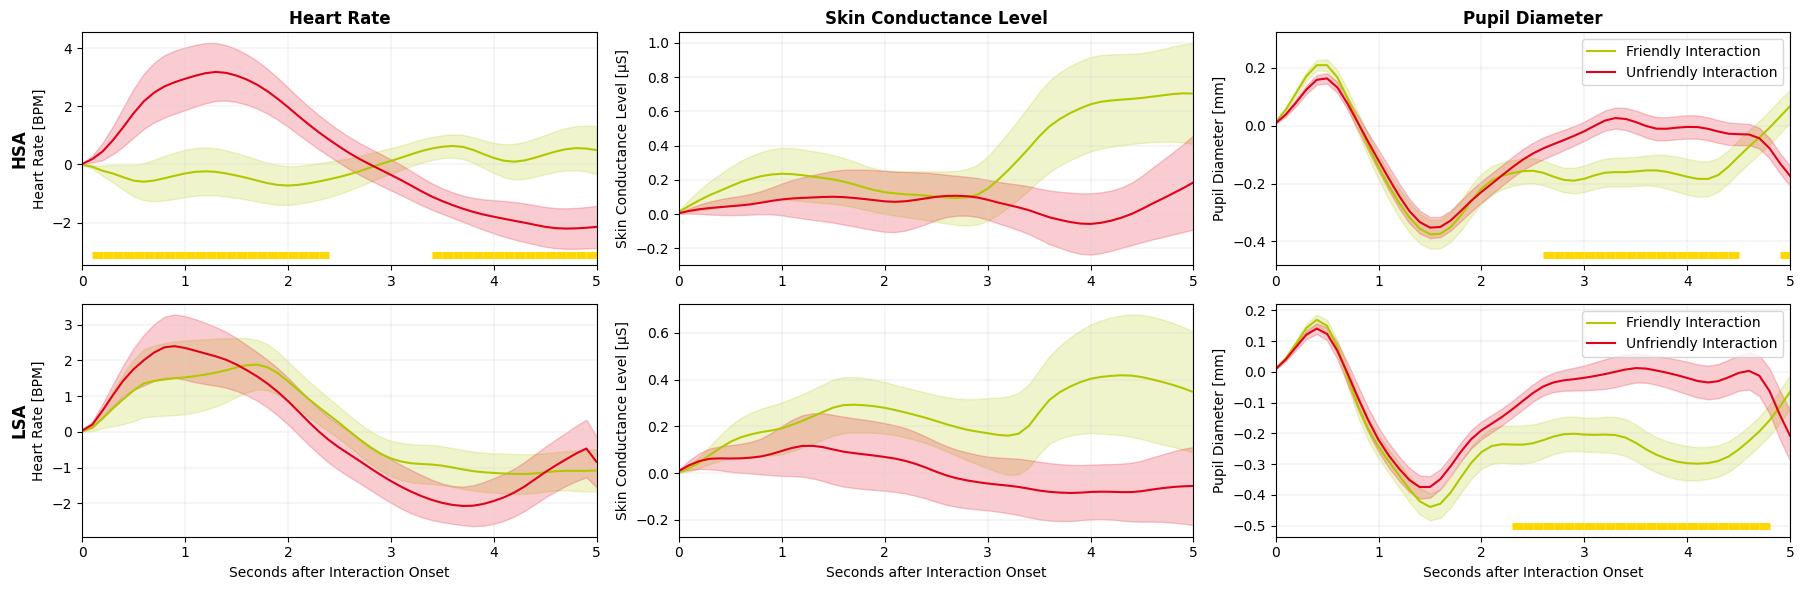

In [10]:
plot_physio.plot_physio_acq(file_path, split=True, median=median, SA_score="SPAI", permutations=permutations)
plt.savefig(os.path.join(save_path, f"physiology_acq.png"), dpi=300)

HR: N - HSA = 22


100%|██████████| 1000/1000 [01:27<00:00, 11.41it/s]


EDA: N - HSA = 21


100%|██████████| 1000/1000 [01:22<00:00, 12.05it/s]


PUPIL: N - HSA = 24


100%|██████████| 1000/1000 [01:22<00:00, 12.14it/s]


HR: N - LSA = 22


100%|██████████| 1000/1000 [01:20<00:00, 12.43it/s]


EDA: N - LSA = 22


100%|██████████| 1000/1000 [01:18<00:00, 12.79it/s]


PUPIL: N - LSA = 24


100%|██████████| 1000/1000 [01:22<00:00, 12.17it/s]


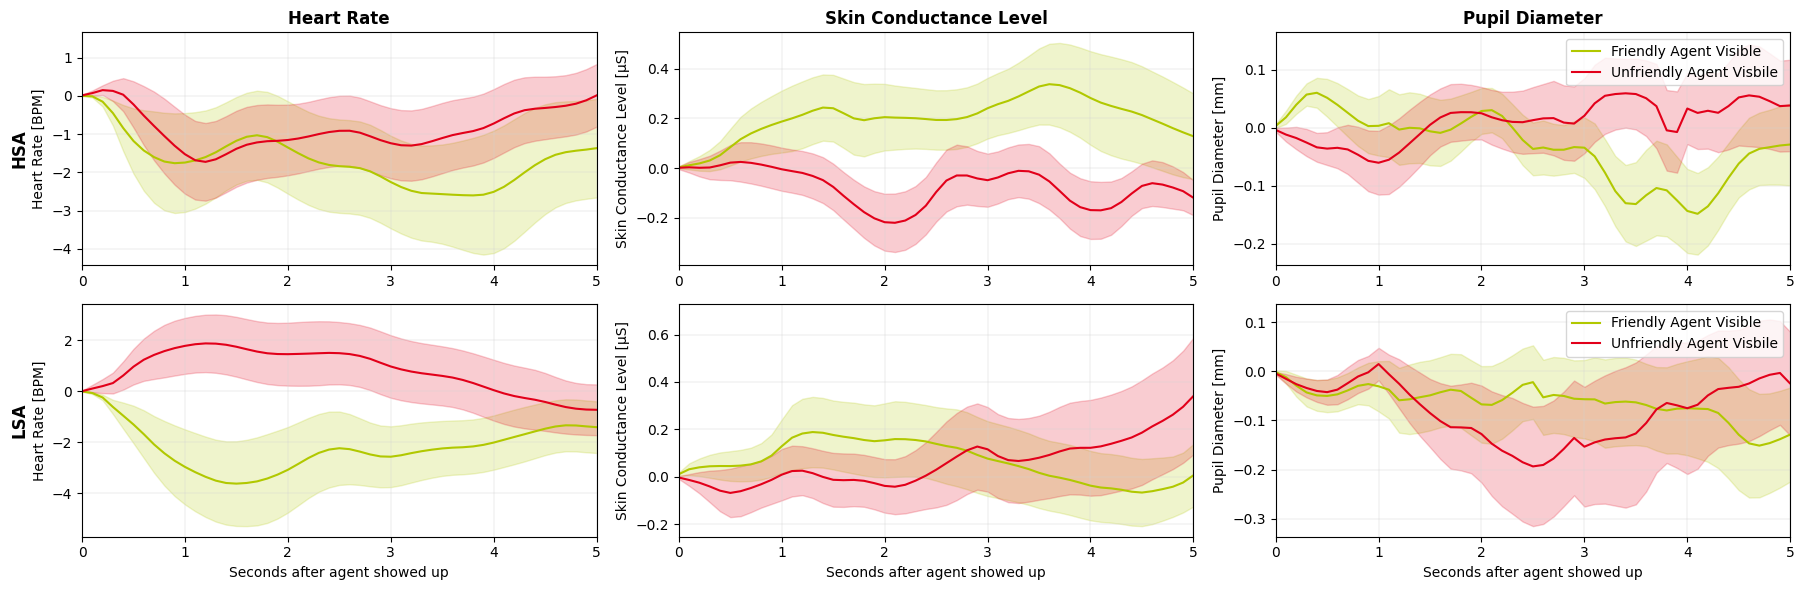

In [11]:
if wave == 1:
    plot_physio.plot_physio_click(file_path, split=True, median=median, SA_score="SPAI", permutations=permutations)
    plt.savefig(os.path.join(save_path, f"physiology_click.png"), dpi=300)
    
elif wave == 2:
    plot_physio.plot_physio_visible(file_path, split=True, median=median, SA_score="SPAI", permutations=permutations)
    plt.savefig(os.path.join(save_path, f"physiology_vis.png"), dpi=300)

HR: N = 44
SS Type III Analysis of Variance Table with Satterthwaite approximated degrees of freedom:
(NOTE: Model refit with orthogonal polynomial contrasts)
SS Type III Analysis of Variance Table with Satterthwaite approximated degrees of freedom:
(NOTE: Model refit with orthogonal polynomial contrasts)
ANOVA: Physio (hr) Test (Condition and SPAI)
Condition Main Effect, F(1, 40.2)=0.02, p=0.884, p_eta_2=0.0
SPAI Main Effect, F(1, 42.2)=0.5, p=0.483, p_eta_2=0.01
Interaction Condition x SPAI, F(1, 40.0)=2.6, p=0.115, p_eta_2=0.05
P-values adjusted by holm method for 1 comparisons
EDA: N = 47
SS Type III Analysis of Variance Table with Satterthwaite approximated degrees of freedom:
(NOTE: Model refit with orthogonal polynomial contrasts)
SS Type III Analysis of Variance Table with Satterthwaite approximated degrees of freedom:
(NOTE: Model refit with orthogonal polynomial contrasts)
ANOVA: Physio (eda) Test (Condition and SPAI)
Condition Main Effect, F(1, 41.2)=0.15, p=0.704, p_eta_2=0

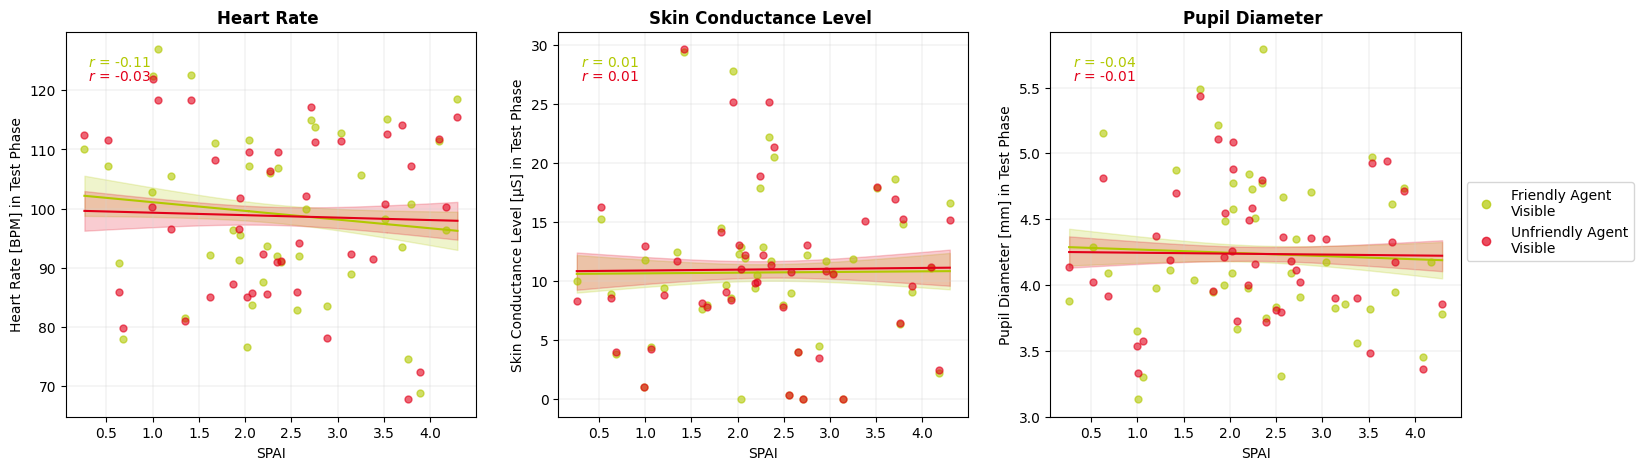

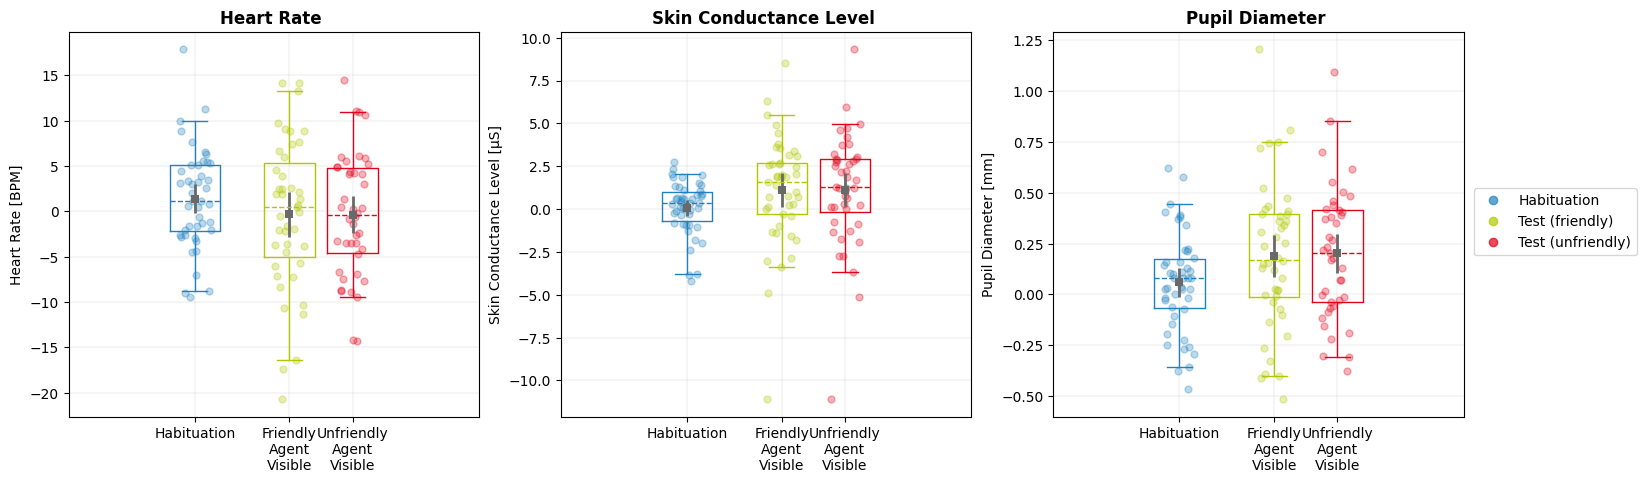

In [9]:
SA_score = "SPAI"
plot_physio.plot_physio_test_sad(file_path, SA_score)
plt.savefig(os.path.join(save_path, f"physiology_test_{SA_score}.png"), dpi=300, bbox_inches="tight")

plot_physio.plot_physio_diff(file_path,save_path, SA_score)
plt.savefig(os.path.join(save_path, f"physiology_hab-test.png"), dpi=300, bbox_inches="tight")

if wave == 1:
    plot_physio.plot_physio_diff_sad(file_path, SA_score)
    plt.savefig(os.path.join(save_path, f"physiology_hab-test_{SA_score}.png"), dpi=300, bbox_inches="tight")